<a href="https://colab.research.google.com/github/uegn/Yatogami7618/blob/master/Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock LSTM

In [0]:
import math
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [72]:
data_original = web.DataReader('M', data_source='yahoo', start='1900-01-01' , end='now')
data_original

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1992-02-05,9.1250,8.2500,9.1250,8.6250,11325800.0,5.140489
1992-02-06,8.6250,8.3750,8.6250,8.4375,5696400.0,5.028738
1992-02-07,8.4375,7.8125,8.4375,7.8125,1698000.0,4.656239
1992-02-10,7.8750,7.5000,7.8750,7.5625,1104400.0,4.507238
1992-02-11,7.6875,7.5625,7.5625,7.6875,656200.0,4.581740
...,...,...,...,...,...,...
2020-04-20,5.7900,5.2500,5.7100,5.3100,32876500.0,5.310000
2020-04-21,5.2800,4.9900,5.1000,5.2200,28374900.0,5.220000
2020-04-22,5.3800,4.7500,5.3700,4.8200,45035500.0,4.820000


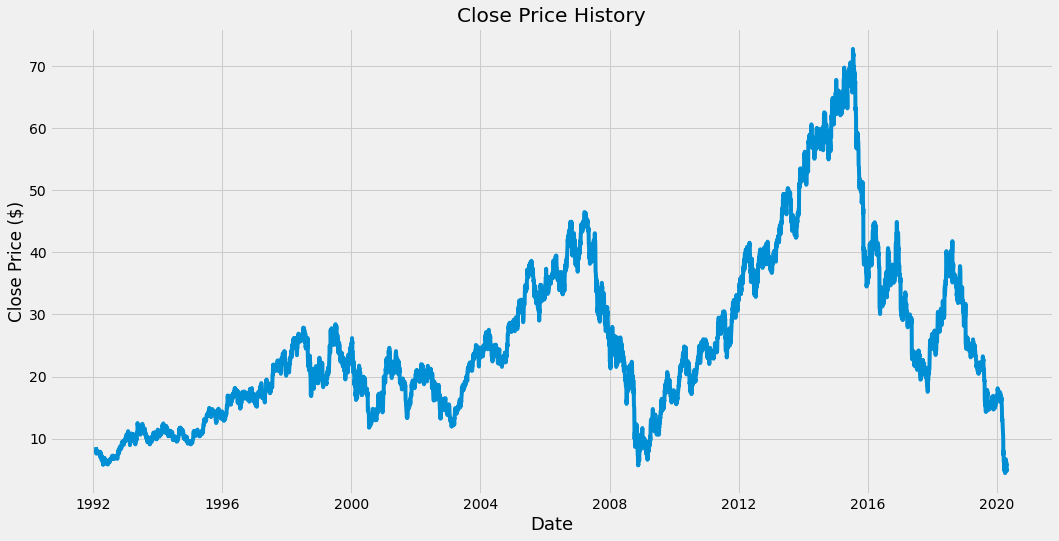

In [60]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data_original['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)')
plt.show()


In [0]:
data_close = data_original.filter(['Close'])
data_set = data_close.values
train_len = math.ceil(len(data_set) * .8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_set)

In [74]:
train_data = scaled_data[0:train_len,:]

amount_of_day = 253
xtrain = []
ytrain = []
for i in range(amount_of_day, len(train_data)):
  xtrain.append(train_data[i-amount_of_day:i,0])
  ytrain.append(train_data[i,0])
  if i <= amount_of_day:
    print(xtrain)
    print(ytrain)
    print()

[array([0.06135732, 0.05861489, 0.04947345, 0.04581688, 0.04764517,
       0.05130174, 0.05221588, 0.04947345, 0.04947345, 0.05221588,
       0.04947345, 0.05130174, 0.05130174, 0.04764517, 0.04673102,
       0.04764517, 0.04855931, 0.04947345, 0.0503876 , 0.04855931,
       0.04764517, 0.04947345, 0.04947345, 0.04855931, 0.04764517,
       0.04764517, 0.04764517, 0.04855931, 0.04764517, 0.04764517,
       0.04581688, 0.04124616, 0.03758959, 0.03758959, 0.0503876 ,
       0.04673102, 0.0421603 , 0.04033202, 0.03941787, 0.03850373,
       0.04490274, 0.0421603 , 0.03941787, 0.03667544, 0.03393301,
       0.03027644, 0.03393301, 0.03667544, 0.03758959, 0.03941787,
       0.03667544, 0.03301887, 0.03027644, 0.03027644, 0.02296329,
       0.02022086, 0.021135  , 0.02022086, 0.02661986, 0.03301887,
       0.03301887, 0.03484716, 0.03301887, 0.03484716, 0.03484716,
       0.03027644, 0.0357613 , 0.03210473, 0.02936229, 0.02844815,
       0.02570572, 0.02570572, 0.02570572, 0.02296329, 0.0220

In [75]:
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtrain.shape

(5434, 253, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
model.fit(xtrain, ytrain, batch_size=1, epochs=1)

Epoch 1/1
5434/5434 [==============================] - 801s 147ms/step - loss: 5.0844e-04


In [0]:
test_data = scaled_data[train_len-amount_of_day: , :]
xtest = []
ytest = data_set[train_len:,:]
for i in range(amount_of_day, len(test_data)):
  xtest.append(test_data[i-amount_of_day:i, 0])

In [87]:
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
prediction = scaler.inverse_transform(model.predict(xtest))
# prediction = scaler.inverse_transform(prediction)
rmse = np.sqrt(np.mean(prediction - ytest)**2)
rmse

2.224304076402142

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


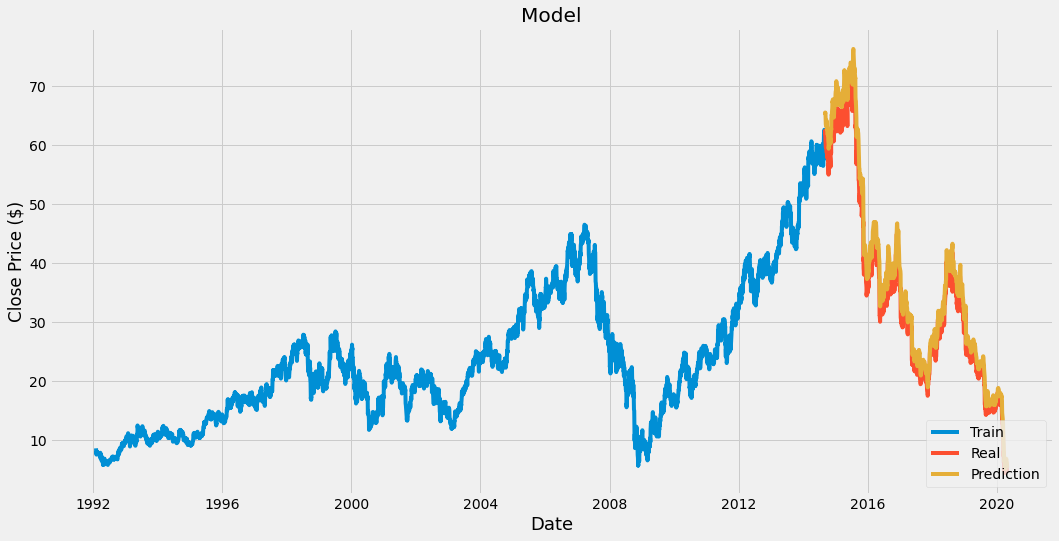

In [85]:
train = data_close[:train_len]
valid = data_close[train_len:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Real', 'Prediction'], loc='lower right')
plt.show()


In [101]:
type(xtest)

numpy.ndarray

In [100]:
xtest

array([[[0.5850519 ],
        [0.58285794],
        [0.59046362],
        ...,
        [0.84730142],
        [0.84627758],
        [0.84525375]],

       [[0.58285794],
        [0.59046362],
        [0.60830772],
        ...,
        [0.84627758],
        [0.84525375],
        [0.83750177]],

       [[0.59046362],
        [0.60830772],
        [0.59455902],
        ...,
        [0.84525375],
        [0.83750177],
        [0.84832526]],

       ...,

       [[0.29106332],
        [0.29574373],
        [0.30159424],
        ...,
        [0.02179319],
        [0.01287114],
        [0.01155477]],

       [[0.29574373],
        [0.30159424],
        [0.28813805],
        ...,
        [0.01287114],
        [0.01155477],
        [0.00570426]],

       [[0.30159424],
        [0.28813805],
        [0.29003948],
        ...,
        [0.01155477],
        [0.00570426],
        [0.0067281 ]]])

In [89]:
 prediction = scaler.inverse_transform(model.predict(xtest[]))

ValueError: ignored